In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, classification_report,
                            roc_auc_score, roc_curve)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re
import string

In [92]:
df = pd.read_csv('Data_classified_phase.csv', na_values=['    ', '     '])

Добавлены na_values - пропущенные значения в столбцах

In [93]:
df.isnull().sum()

,0
Kpmag,0
numax,0
e_numax,0
Delnu,0
e_Delnu,0
A,537
e_A,537
Width,537
e_Width,537
Teff,0


In [94]:
df.describe()

,Kpmag,numax,e_numax,Delnu,e_Delnu,A,e_A,Width,e_Width,Teff,...,e_NoCorR,RGBcorM,e_RGBcorM,RGBcorR,e_RGBcorR,ClcorM,e_ClcorM,ClcorR,e_ClcorR,Phase
count,15388.000000,15388.000000,15388.000000,15388.00000,15388.000000,14851.000000,14851.000000,14851.000000,14851.000000,15388.00000,...,15388.000000,15388.000000,15388.000000,15388.000000,15388.00000,15388.000000,15388.000000,15388.000000,15388.000000,15388.000000
mean,12.632402,64.673195,0.903276,6.16765,0.047327,95.059174,5.328045,20.241620,2.009454,4903.08994,...,0.407304,1.344886,0.126670,9.720831,0.39403,1.422839,0.134646,10.024309,0.409406,1.500585
std,1.211778,50.958690,0.891080,3.56072,0.069763,51.897428,5.110774,11.734342,2.181685,212.91843,...,0.452677,0.409900,0.106109,3.053634,0.42836,0.417293,0.114116,3.216817,0.453516,0.500016
min,6.240000,3.970000,0.040000,0.74700,0.008000,10.700000,0.700000,1.800000,0.200000,3225.00000,...,0.060000,0.340000,0.030000,3.240000,0.06000,0.430000,0.040000,3.470000,0.060000,1.000000
25%,11.900000,31.680000,0.560000,3.97675,0.017000,59.900000,2.800000,13.000000,1.100000,4769.00000,...,0.180000,1.100000,0.080000,7.880000,0.17000,1.170000,0.090000,8.160000,0.180000,1.000000
50%,12.850000,42.260000,0.720000,4.54050,0.028000,90.800000,4.400000,15.600000,1.400000,4907.00000,...,0.310000,1.270000,0.100000,10.220000,0.30000,1.350000,0.110000,10.520000,0.310000,2.000000
75%,13.510000,79.522500,1.000000,7.27000,0.050000,120.900000,6.000000,23.700000,2.000000,5047.00000,...,0.460000,1.480000,0.130000,11.160000,0.45000,1.580000,0.140000,11.450000,0.460000,2.000000
max,16.850000,273.160000,70.270000,19.29400,1.338000,745.200000,82.800000,101.200000,46.900000,6356.00000,...,9.800000,5.150000,2.800000,48.610000,9.00000,5.240000,2.950000,51.190000,9.800000,2.000000


In [95]:
df = df.fillna(method='ffill')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15388 entries, 0 to 15387
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Kpmag      15388 non-null  float64
 1   numax      15388 non-null  float64
 2   e_numax    15388 non-null  float64
 3   Delnu      15388 non-null  float64
 4   e_Delnu    15388 non-null  float64
 5   A          15388 non-null  float64
 6   e_A        15388 non-null  float64
 7   Width      15388 non-null  float64
 8   e_Width    15388 non-null  float64
 9   Teff       15388 non-null  int64  
 10  e_Teff     15388 non-null  int64  
 11  log(g)     15388 non-null  float64
 12  e_log(g)   15388 non-null  float64
 13  [Fe/H]     15388 non-null  float64
 14  e_[Fe/H]   15388 non-null  float64
 15  NoCorM     15388 non-null  float64
 16  e_NoCorM   15388 non-null  float64
 17  NoCorR     15388 non-null  float64
 18  e_NoCorR   15388 non-null  float64
 19  RGBcorM    15388 non-null  float64
 20  e_RGBc

<ipython-input-95-b359035f3f36>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


Заполнены нулевые значения


'accuracy': 0.9646956898418887
'precision': 0.9647150621846318
'recall': 0.9646956898418887
'f1': 0.9646951929780563


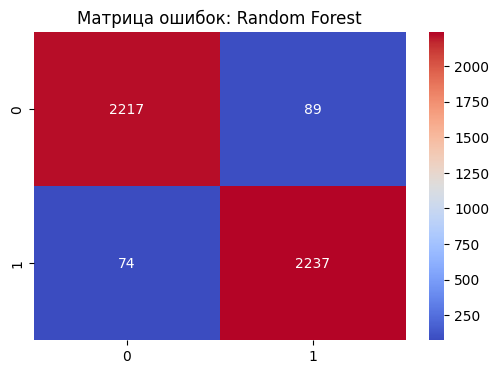

'accuracy': 0.7753952783192549
'precision': 0.7768968276127753
'recall': 0.7753952783192549
'f1': 0.7750777083274155


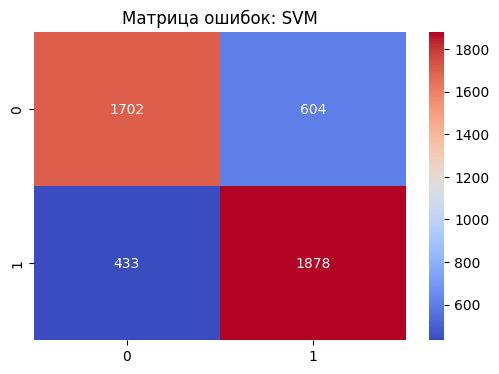

'accuracy': 0.8778427550357375
'precision': 0.8794794685082711
'recall': 0.8778427550357375
'f1': 0.8777058418750527


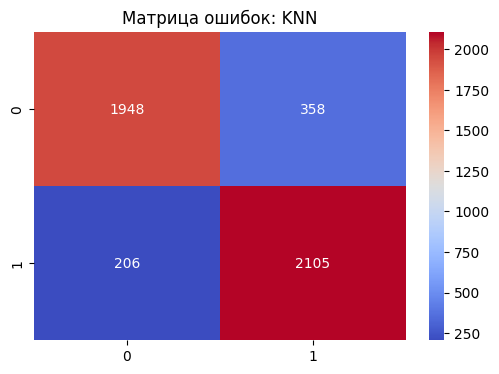

'accuracy': 0.9607970543643058
'precision': 0.9608348039779635
'recall': 0.9607970543643058
'f1': 0.9607960501986433


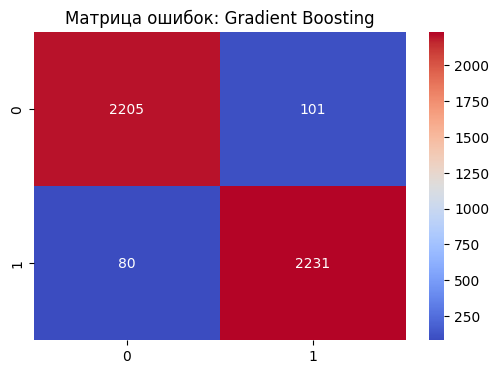

In [110]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Phase', axis=1), df['Phase'], test_size=0.3, random_state=42, stratify=df['Phase'])
models = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'SVM': SVC(probability=True, random_state=42),
        'KNN': KNeighborsClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42)}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"'accuracy': {accuracy_score(y_test, y_pred)}"),
    print(f"'precision': {precision_score(y_test, y_pred, average='weighted')}"),
    print(f"'recall': {recall_score(y_test, y_pred, average='weighted')}"),
    print(f"'f1': {f1_score(y_test, y_pred, average='weighted')}")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'Матрица ошибок: {name}')
    plt.show()

Выбираем как лучшый классификатор RandomForest

In [78]:
param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


Подобраны лучшие параметры для модели

In [81]:
params = {
        'n_estimators': [200],
        'max_depth': [None],
        'min_samples_split': [5],
        'min_samples_leaf': [2]}
grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42),
        params,
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_score_

np.float64(0.9584984287202492)

In [82]:
model = RandomForestClassifier(random_state=42, max_depth = None, n_estimators = 200, min_samples_split = 5, min_samples_leaf = 2)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [90]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.964479098982023

Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.96      0.96      2306
           2       0.96      0.97      0.96      2311

    accuracy                           0.96      4617
   macro avg       0.96      0.96      0.96      4617
weighted avg       0.96      0.96      0.96      4617


Confusion Matrix:
[[2212   94]
 [  70 2241]]


In [97]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [100]:
text_data = pd.read_csv('sentiment_data.csv')
text_data

,Unnamed: 0,text,sentiment
0,0,Неспешные снимки\nЗапись на снимок возможна на...,1
1,1,"Все просто замечательно, минус только один - о...",0
2,2,В кафе приятненько . Часто заказываем пиццу н...,0
3,3,Халатное отношение\nВызвали сегодня скорую в О...,1
4,4,цель поездки деловая и соответственно отель вы...,0
...,...,...,...
14995,14995,"Большой отель, и дорогой для Берлина. При том ...",0
14996,14996,"ост, я вижу, не подзамочный. Можно ссылаться? ...",0
14997,14997,Долгое выполнение анализов\nДелали анализ кров...,1
14998,14998,"Останавливались в отеле на одну ночь, хотя спо...",1


In [101]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [102]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [103]:
text_data['cleaned_text'] = text_data['text'].apply(clean_text)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(text_data['cleaned_text'], text_data['sentiment'], test_size=0.3, random_state=42, stratify=text_data['sentiment'])

In [108]:
models = {
    'Logistic Regression': Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('lr', LogisticRegression(max_iter=1000))]),
    'Naive Bayes': Pipeline([
        ('count', CountVectorizer(max_features=5000)),
        ('nb', MultinomialNB())]),
    'SVM': Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('svm', SVC(kernel='linear'))])}


Random Forest Результаты:
              precision    recall  f1-score   support

           1       0.97      0.96      0.96      2306
           2       0.96      0.97      0.96      2311

    accuracy                           0.96      4617
   macro avg       0.96      0.96      0.96      4617
weighted avg       0.96      0.96      0.96      4617

Accuracy: 0.9647


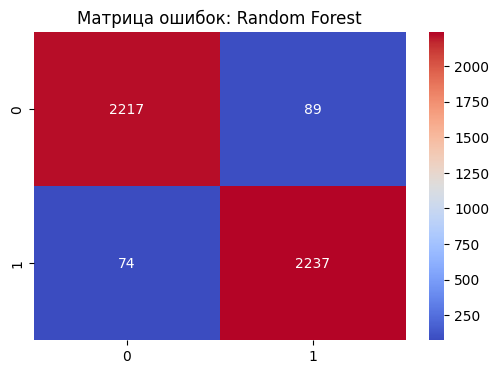


SVM Результаты:
              precision    recall  f1-score   support

           1       0.80      0.74      0.77      2306
           2       0.76      0.81      0.78      2311

    accuracy                           0.78      4617
   macro avg       0.78      0.78      0.78      4617
weighted avg       0.78      0.78      0.78      4617

Accuracy: 0.7754


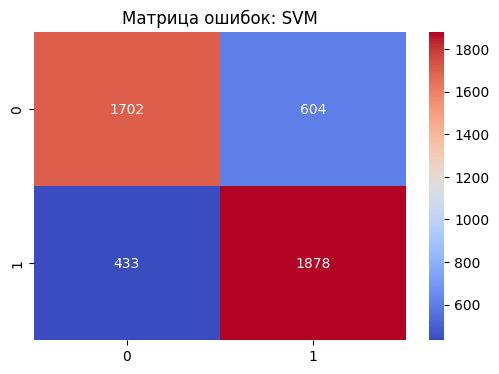


KNN Результаты:
              precision    recall  f1-score   support

           1       0.90      0.84      0.87      2306
           2       0.85      0.91      0.88      2311

    accuracy                           0.88      4617
   macro avg       0.88      0.88      0.88      4617
weighted avg       0.88      0.88      0.88      4617

Accuracy: 0.8778


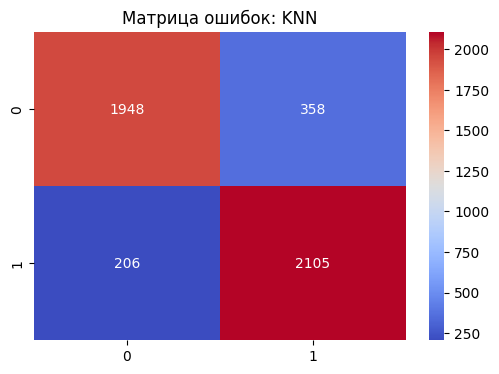


Gradient Boosting Результаты:
              precision    recall  f1-score   support

           1       0.96      0.96      0.96      2306
           2       0.96      0.97      0.96      2311

    accuracy                           0.96      4617
   macro avg       0.96      0.96      0.96      4617
weighted avg       0.96      0.96      0.96      4617

Accuracy: 0.9608


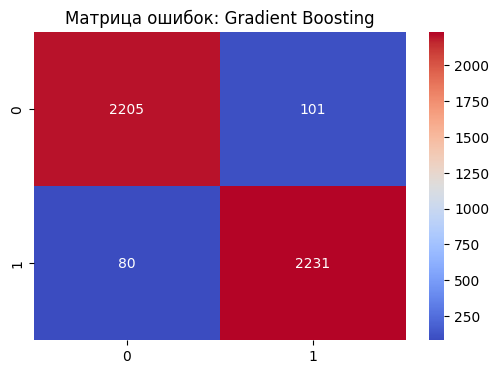

In [111]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f'\n{name} Результаты:')
    print(classification_report(y_test, y_pred))
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'Матрица ошибок: {name}')
    plt.show()

In [114]:
param_grid = {
    'tfidf__max_features': [3000, 5000, 7000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'lr__C': [0.1, 1, 10],
    'lr__penalty': ['l1', 'l2']}

best_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lr', LogisticRegression(solver='liblinear', max_iter=1000))])

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('lr',
                                        LogisticRegression(max_iter=1000,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'lr__C': [0.1, 1, 10], 'lr__penalty': ['l1', 'l2'],
                         'tfidf__max_features': [3000, 5000, 7000],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='accuracy')

In [116]:
print("Лучшие параметры:", grid_search.best_params_)
final_model = grid_search.best_estimator_
final_pred = final_model.predict(X_test)
print("Отчет классификации:\n", classification_report(y_test, final_pred))

Лучшие параметры: {'lr__C': 1, 'lr__penalty': 'l2', 'tfidf__max_features': 7000, 'tfidf__ngram_range': (1, 1)}
Отчет классификации:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      2250
           1       0.87      0.83      0.85      2250

    accuracy                           0.85      4500
   macro avg       0.85      0.85      0.85      4500
weighted avg       0.85      0.85      0.85      4500

